In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\data project\bitcoin\bitcoin_price_Training - Training.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.shape

(1556, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [7]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [ ]:
#Change in price overtime?

In [40]:
df


,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [60]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [80]:
col = df.columns[1:6]

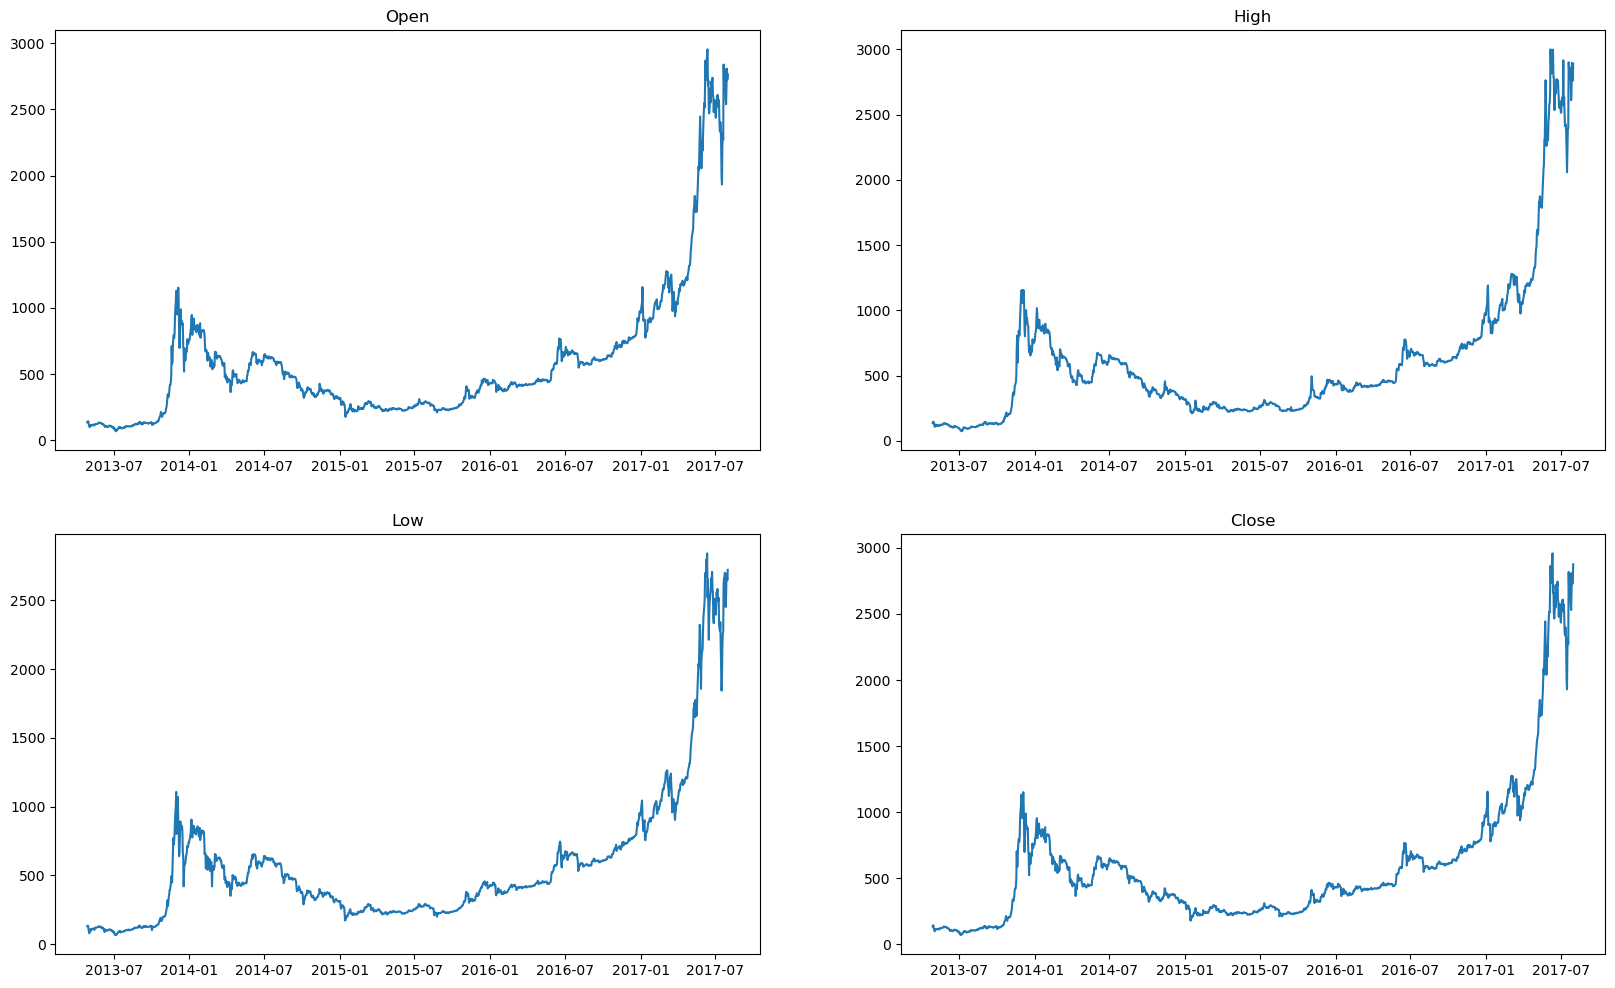

In [79]:
plt.figure(figsize=(20,12))

for i, col in enumerate(cols):
    plt.subplot(2,2,i+1)
    plt.plot(df['Date'],df[col])
    plt.title(col)

In [91]:
bitcoin_sample = df[0:50]

In [92]:
!pip install chart_studio
!pip install plotly

In [93]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [94]:
init_notebook_mode(connected=True)

In [99]:
trace = go.Candlestick(x=bitcoin_sample['Date'],
                high=bitcoin_sample['High'],
                open=bitcoin_sample['Open'],
                close=bitcoin_sample['Close'],
                low=bitcoin_sample['Low'])

In [106]:
candle_data = [trace]
layout={
    'title':'Bitcoin Historical Price',
    'xaxis':{'title':'Date'}
}

In [108]:
fig = go.Figure(data= candle_data,layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [109]:
#Analysing closing price

<Axes: >

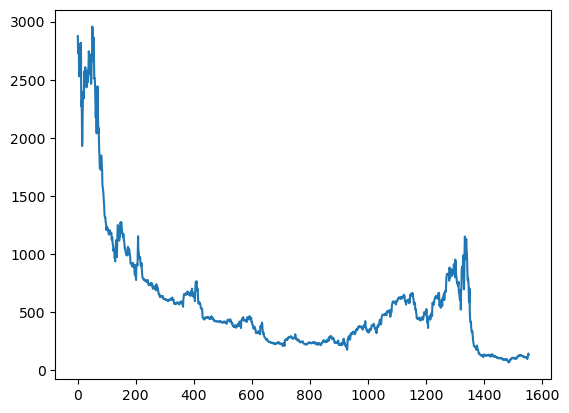

In [110]:
df['Close'].plot()

In [112]:
df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

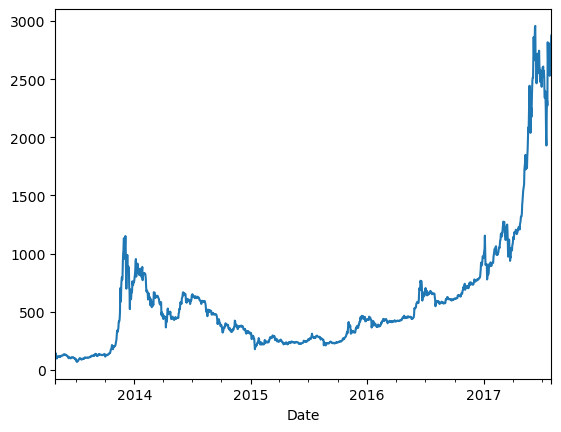

In [134]:
df['Close'].plot()


Text(0.5, 1.0, 'Log Scale')

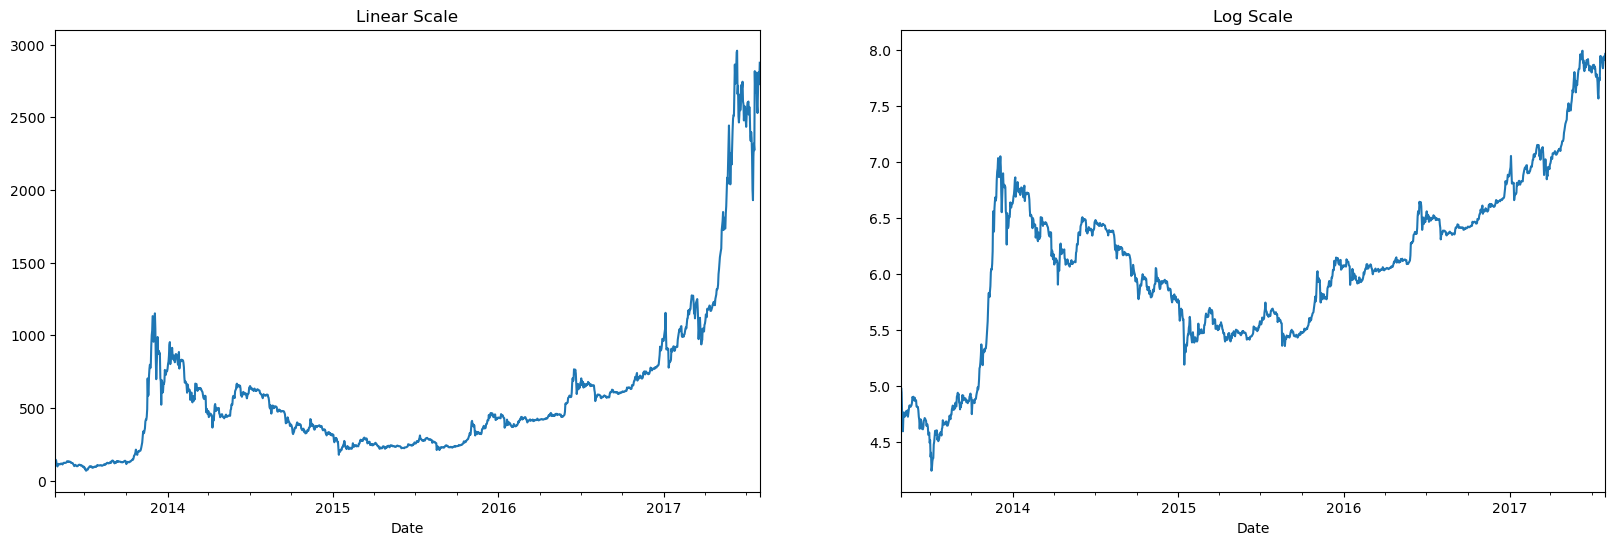

In [137]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
df['Close'].plot()
plt.title('Linear Scale')


plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title('Log Scale')


In [ ]:
# Analyse closing Price,Quarterly,Monthly basis

<Axes: xlabel='Date'>

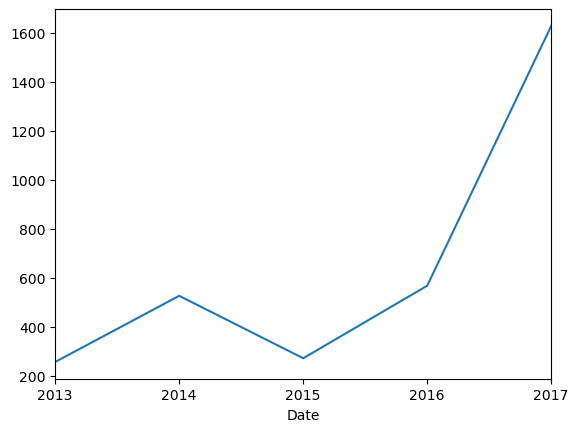

In [144]:
df['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

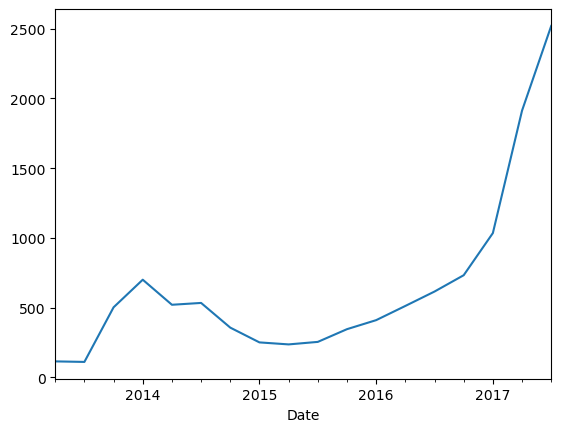

In [145]:
df['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

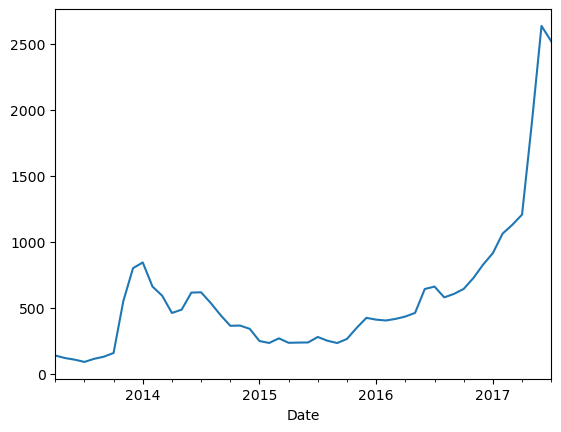

In [146]:
df['Close'].resample('M').mean().plot()

In [148]:
#Analyse Daily change in closing price of stock

In [154]:
df['Close_Diff'] = df['Close'].pct_change() * 100

<Axes: xlabel='Date'>

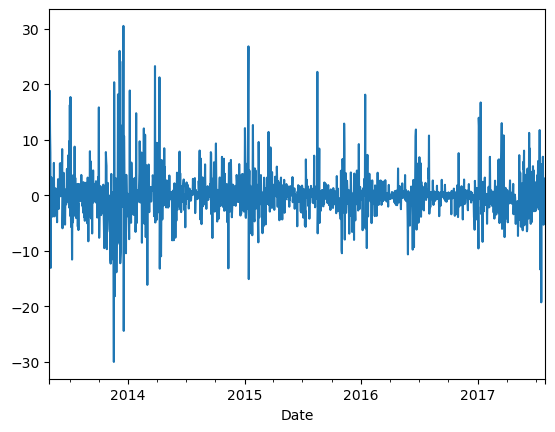

In [156]:
df['Close_Diff'].plot()

In [162]:
!pip install 

  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=defdd82f01f2b9652470d3ebe42bd0a7379330feb19cd7784626d676fd9fb777
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [167]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [168]:

import cufflinks as cf

In [169]:
cf.go_offline()

In [171]:
type(df['Close_Diff'])

pandas.core.series.Series

In [172]:
df['Close_Diff'].iplot()